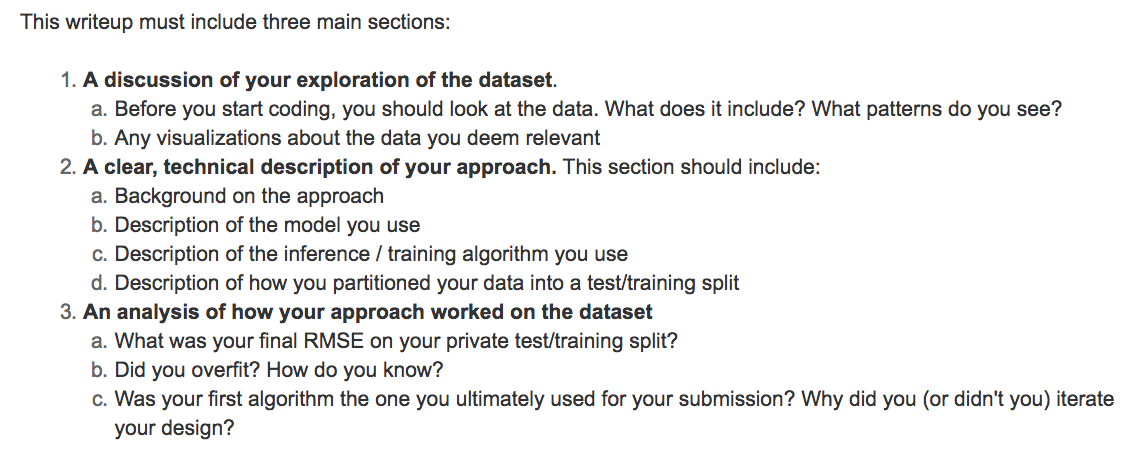

In [5]:
from IPython.display import Image
Image(filename='rubric.png')

In [14]:
import matplotlib.pyplot as plt
import seaborn
import pandas
import numpy as np 
%matplotlib inline

ur = pandas.read_csv('movie_training_data/user_ratedmovies_train.dat','\t')

In [15]:
# create a test/train split
 
all_inds = np.random.permutation( range(0,len(ur)) )
test_inds = all_inds[0:85000]
train_inds = all_inds[85000:len(ur)]
 
ur_test = ur.iloc[ test_inds ]
ur_train = ur.iloc[ train_inds ]

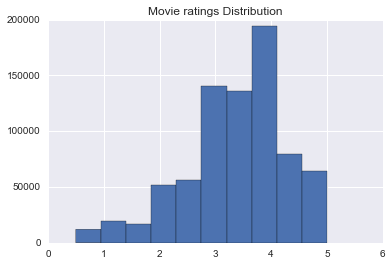

In [16]:
plt.hist( ur['rating'] ,bins = 10)
plt.title("Movie ratings Distribution")
plt.show()

In [27]:
# This Cell is formatted

import pylab
import matplotlib.pyplot as plt
import matplotlib.cm as cm
 
import numpy
import pickle
 
class ProbabilisticMatrixFactorization():

    def __init__(self, rating_tuples, latent_d=1):
        self.latent_d = latent_d
        self.learning_rate = .0001
        self.regularization_strength = 0.1

        self.ratings = numpy.array(rating_tuples).astype(float)
        self.converged = False

        self.num_users = int(numpy.max(self.ratings[:, 0]) + 1)
        self.num_items = int(numpy.max(self.ratings[:, 1]) + 1)

        print (self.num_users, self.num_items, self.latent_d)
        print self.ratings

        self.users = numpy.random.random((self.num_users, self.latent_d))
        self.items = numpy.random.random((self.num_items, self.latent_d))

        self.new_users = numpy.random.random((self.num_users, self.latent_d))
        self.new_items = numpy.random.random((self.num_items, self.latent_d))          
 
 
    def likelihood(self, users=None, items=None):
        if users is None:
            users = self.users
        if items is None:
            items = self.items
 
        sq_error = 0
 
        for rating_tuple in self.ratings:
            if len(rating_tuple) == 3:
                (i, j, rating) = rating_tuple
                weight = 1
            elif len(rating_tuple) == 4:
                (i, j, rating, weight) = rating_tuple
 
            r_hat = numpy.sum(users[i] * items[j])
 
            sq_error += weight * (rating - r_hat)**2
 
        L2_norm = 0
        for i in range(self.num_users):
            for d in range(self.latent_d):
                L2_norm += users[i, d]**2
 
        for i in range(self.num_items):
            for d in range(self.latent_d):
                L2_norm += items[i, d]**2
 
        return -sq_error - self.regularization_strength * L2_norm


    def update(self):
 
        updates_o = numpy.zeros((self.num_users, self.latent_d))
        updates_d = numpy.zeros((self.num_items, self.latent_d))       

        for rating_tuple in self.ratings:
            if len(rating_tuple) == 3:
                (i, j, rating) = rating_tuple
                weight = 1
            elif len(rating_tuple) == 4:
                (i, j, rating, weight) = rating_tuple

            r_hat = numpy.sum(self.users[i] * self.items[j])

            for d in range(self.latent_d):
                updates_o[i, d] += self.items[j, d] * (rating - r_hat) * weight
                updates_d[j, d] += self.users[i, d] * (rating - r_hat) * weight
 
        while (not self.converged):
            initial_lik = self.likelihood()
 
            print "  setting learning rate =", self.learning_rate
            self.try_updates(updates_o, updates_d)
 
            final_lik = self.likelihood(self.new_users, self.new_items)

            if final_lik > initial_lik:
                self.apply_updates(updates_o, updates_d)
                self.learning_rate *= 1.25

                if final_lik - initial_lik < .1:
                    self.converged = True

                break
            else:
                self.learning_rate *= .5
                self.undo_updates()

            if self.learning_rate < 1e-10:
                self.converged = True

        return not self.converged
    
    
    def undo_updates(self):
        # Don't need to do anything here
        pass
 
 
    def print_latent_vectors(self):
        print "Users"
        for i in range(self.num_users):
            print i,
            for d in range(self.latent_d):
                print self.users[i, d],
            print
 
        print "Items"
        for i in range(self.num_items):
            print i,
            for d in range(self.latent_d):
                print self.items[i, d],
            print   
 
 
    def save_latent_vectors(self, prefix):
        self.users.dump(prefix + "%sd_users.pickle" % self.latent_d)
        self.items.dump(prefix + "%sd_items.pickle" % self.latent_d)
 
 

In [ ]:
import pylab
import matplotlib.pyplot as plt
import matplotlib.cm as cm
 
import numpy
import pickle
 
class ProbabilisticMatrixFactorization():

    def __init__(self, rating_tuples, latent_d=1):
        self.latent_d = latent_d
        self.learning_rate = .0001
        self.regularization_strength = 0.1

        self.ratings = numpy.array(rating_tuples).astype(float)
        self.converged = False

        self.num_users = int(numpy.max(self.ratings[:, 0]) + 1)
        self.num_items = int(numpy.max(self.ratings[:, 1]) + 1)

        print (self.num_users, self.num_items, self.latent_d)
        print self.ratings

        self.users = numpy.random.random((self.num_users, self.latent_d))
        self.items = numpy.random.random((self.num_items, self.latent_d))

        self.new_users = numpy.random.random((self.num_users, self.latent_d))
        self.new_items = numpy.random.random((self.num_items, self.latent_d))          
 
 
    def likelihood(self, users=None, items=None):
        if users is None:
            users = self.users
        if items is None:
            items = self.items
 
        sq_error = 0
 
        for rating_tuple in self.ratings:
            if len(rating_tuple) == 3:
                (i, j, rating) = rating_tuple
                weight = 1
            elif len(rating_tuple) == 4:
                (i, j, rating, weight) = rating_tuple
 
            r_hat = numpy.sum(users[i] * items[j])
 
            sq_error += weight * (rating - r_hat)**2
 
        L2_norm = 0
        for i in range(self.num_users):
            for d in range(self.latent_d):
                L2_norm += users[i, d]**2
 
        for i in range(self.num_items):
            for d in range(self.latent_d):
                L2_norm += items[i, d]**2
 
        return -sq_error - self.regularization_strength * L2_norm
 
 
    def update(self):
 
        updates_o = numpy.zeros((self.num_users, self.latent_d))
        updates_d = numpy.zeros((self.num_items, self.latent_d))       

        for rating_tuple in self.ratings:
            if len(rating_tuple) == 3:
                (i, j, rating) = rating_tuple
                weight = 1
            elif len(rating_tuple) == 4:
                (i, j, rating, weight) = rating_tuple

            r_hat = numpy.sum(self.users[i] * self.items[j])

            for d in range(self.latent_d):
                updates_o[i, d] += self.items[j, d] * (rating - r_hat) * weight
                updates_d[j, d] += self.users[i, d] * (rating - r_hat) * weight
 
        while (not self.converged):
            initial_lik = self.likelihood()
 
            print "  setting learning rate =", self.learning_rate
            self.try_updates(updates_o, updates_d)
 
            final_lik = self.likelihood(self.new_users, self.new_items)

            if final_lik > initial_lik:
                self.apply_updates(updates_o, updates_d)
                self.learning_rate *= 1.25

                if final_lik - initial_lik < .1:
                    self.converged = True

                break
            else:
                self.learning_rate *= .5
                self.undo_updates()

            if self.learning_rate < 1e-10:
                self.converged = True

        return not self.converged
 
 
    def apply_updates(self, updates_o, updates_d):
        for i in range(self.num_users):
            for d in range(self.latent_d):
                self.users[i, d] = self.new_users[i, d]

        for i in range(self.num_items):
            for d in range(self.latent_d):
                self.items[i, d] = self.new_items[i, d]               
 
 
    def try_updates(self, updates_o, updates_d):       
        alpha = self.learning_rate
        beta = -self.regularization_strength

        for i in range(self.num_users):
            for d in range(self.latent_d):
                self.new_users[i,d] = self.users[i, d] + \
                                        alpha * (beta * self.users[i, d] + updates_o[i, d])
        for i in range(self.num_items):
            for d in range(self.latent_d):
                self.new_items[i, d] = self.items[i, d] + \
                                        alpha * (beta * self.items[i, d] + updates_d[i, d])
 
 
    def undo_updates(self):
        # Don't need to do anything here
        pass
 
 
    def print_latent_vectors(self):
        print "Users"
        for i in range(self.num_users):
            print i,
            for d in range(self.latent_d):
                print self.users[i, d],
            print
 
        print "Items"
        for i in range(self.num_items):
            print i,
            for d in range(self.latent_d):
                print self.items[i, d],
            print   
 
 
    def save_latent_vectors(self, prefix):
        self.users.dump(prefix + "%sd_users.pickle" % self.latent_d)
        self.items.dump(prefix + "%sd_items.pickle" % self.latent_d)
 
 
    def fake_ratings(noise=.25):
u = []
v = []
ratings = []
 
num_users = 100
num_items = 100
num_ratings = 30
latent_dimension = 10
 
# Generate the latent user and item vectors
for i in range(num_users):
u.append(2 * numpy.random.randn(latent_dimension))
for i in range(num_items):
v.append(2 * numpy.random.randn(latent_dimension))
 
# Get num_ratings ratings per user.
for i in range(num_users):
items_rated = numpy.random.permutation(num_items)[:num_ratings]
 
for jj in range(num_ratings):
j = items_rated[jj]
rating = numpy.sum(u[i] * v[j]) + noise * numpy.random.randn()
 
ratings.append((i, j, rating))  # thanks sunquiang
 
return (ratings, u, v)

def plot_ratings(ratings):
xs = []
ys = []
 
for i in range(len(ratings)):
xs.append(ratings[i][1])
ys.append(ratings[i][2])
 
pylab.plot(xs, ys, 'bx')
pylab.show()
 
 
def plot_latent_vectors(U, V):
fig = plt.figure()
ax = fig.add_subplot(121)
cmap = cm.jet
ax.imshow(U, cmap=cmap, interpolation='nearest')
plt.title("Users")
plt.axis("off")
 
ax = fig.add_subplot(122)
ax.imshow(V, cmap=cmap, interpolation='nearest')
plt.title("Items")
plt.axis("off")
 
def plot_predicted_ratings(U, V):
r_hats = -5 * numpy.ones((U.shape[0] + U.shape[1] + 1,
V.shape[0] + V.shape[1] + 1))
 
for i in range(U.shape[0]):
for j in range(U.shape[1]):
r_hats[i + V.shape[1] + 1, j] = U[i, j]
 
for i in range(V.shape[0]):
for j in range(V.shape[1]):
r_hats[j, i + U.shape[1] + 1] = V[i, j]
 
for i in range(U.shape[0]):
for j in range(V.shape[0]):
r_hats[i + U.shape[1] + 1, j + V.shape[1] + 1] = numpy.dot(U[i], V[j]) / 10
 
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(r_hats, cmap=cm.gray, interpolation='nearest')
plt.title("Predicted Ratings")
plt.axis("off")
 

if __name__ == "__main__":

DATASET = 'fake'

if DATASET == 'fake':
(ratings, true_o, true_d) = fake_ratings()
 
#plot_ratings(ratings)
 
pmf = ProbabilisticMatrixFactorization(ratings, latent_d=5)

liks = []
while (pmf.update()):
lik = pmf.likelihood()
liks.append(lik)
print "L=", lik
pass
 
plt.figure()
plt.plot(liks)
plt.xlabel("Iteration")
plt.ylabel("Log Likelihood")
 
plot_latent_vectors(pmf.users, pmf.items)
plot_predicted_ratings(pmf.users, pmf.items)
plt.show()
 
pmf.print_latent_vectors()
pmf.save_latent_vectors("models/")